In [3]:
import gym
import hiive.mdptoolbox, hiive.mdptoolbox.example, hiive.mdptoolbox.mdp
import hiive.mdptoolbox as mdptoolbox
import hiive.visualization
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

# set this so that in QL taking random actions based upon the value of epsilon, 
# you're generating random numbers consistently to compare against epsilon
np.random.seed(42) 

iterations:112
Time: 0.00543522834777832
Policy: (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Value: (31.749455165201972, 32.27827460787745, 32.58549932039343, 33.216606696310876, 33.92492024952909, 34.71988495572239, 35.61210123652293, 36.61346631037317, 37.73733283545759, 38.99868696013147, 40.414348155051655, 42.003193491662415, 43.78640935766776, 45.78777396597903, 48.033974424240824, 50.55496259288482, 53.38435447688482, 56.55987847688482, 60.12387847688482, 64.12387847688481)


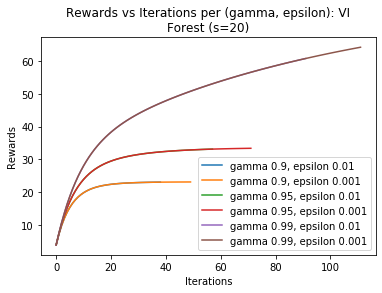

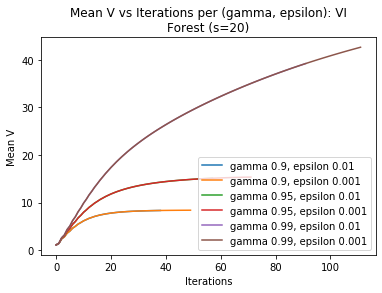

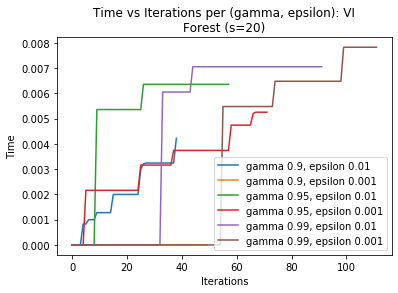

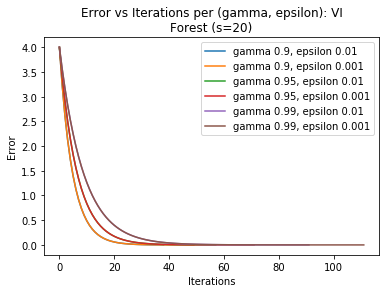

In [2]:
# VALUE ITERATION SMALL

trans_m, reward_m = mdptoolbox.example.forest(S=20)

# VALUE ITERATION
# hparams tuning
# gamma
gamma = [.9, .95, .99]

#stopping factor
epsilon = [.01, .001]

for g in gamma:
    for e in epsilon:
        vi = mdptoolbox.mdp.ValueIteration(trans_m, reward_m, epsilon=e ,gamma=g)
        vi.run()

        reward_stats = [stat['Reward'] for stat in vi.run_stats]
        plt.figure(1)
        plt.plot(range(0, vi.iter), reward_stats, label="gamma " + str(g) + ", epsilon " + str(e))
        plt.legend()
        plt.title("Rewards vs Iterations per (gamma, epsilon): VI\nForest (s=20)")
        plt.ylabel("Rewards")
        plt.xlabel("Iterations")
        plt.savefig('../images/vi_forest/Rewards_vs_Iterations_vi_gamma_small.png')


        meanv_stats = [stat['Mean V'] for stat in vi.run_stats]
        plt.figure(2)
        plt.plot(range(0, vi.iter), meanv_stats, label="gamma " + str(g) + ", epsilon " + str(e))
        plt.legend()
        plt.title("Mean V vs Iterations per (gamma, epsilon): VI\nForest (s=20)")
        plt.ylabel("Mean V")
        plt.xlabel("Iterations")
        plt.savefig('../images/vi_forest/MeanV_vs_Iterations_vi_gamma_small.png')

        time_stats = [stat['Time'] for stat in vi.run_stats]
        plt.figure(3)
        plt.plot(range(0, vi.iter), time_stats, label="gamma " + str(g) + ", epsilon " + str(e))
        plt.legend()
        plt.title("Time vs Iterations per (gamma, epsilon): VI\nForest (s=20)")
        plt.ylabel("Time")
        plt.xlabel("Iterations")
        plt.savefig('../images/vi_forest/Time_vs_Iterations_vi_gamma_small.png')

        err_stats = [stat['Error'] for stat in vi.run_stats]
        plt.figure(4)
        plt.plot(range(0, vi.iter), err_stats, label="gamma " + str(g) + ", epsilon " + str(e))
        plt.legend()
        plt.title("Error vs Iterations per (gamma, epsilon): VI\nForest (s=20)")
        plt.ylabel("Error")
        plt.xlabel("Iterations")
        plt.savefig('../images/vi_forest/Error_vs_Iterations_vi_gamma_small.png')
        
# Show Optimal policy
vi = mdptoolbox.mdp.ValueIteration(trans_m, reward_m, epsilon=.001 ,gamma=.99)
vi.run()
print('iterations:' + str(vi.iter))
print('Time: ' + str(vi.time))
print('Policy: ' + str(vi.policy))
print('Value: ' + str(vi.V))

In [4]:
# from example https://pymdptoolbox.readthedocs.io/en/latest/api/example.html#module-mdptoolbox.example
# P probability matrix, R reward matrix
# Default 3 states
# 2 actions Wait (a0), Cut (a1).
# state values 0-youngest, -S max oldest
trans_m, reward_m = mdptoolbox.example.forest(S=1000)

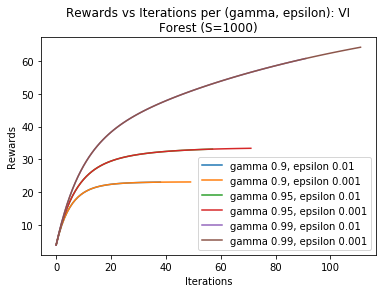

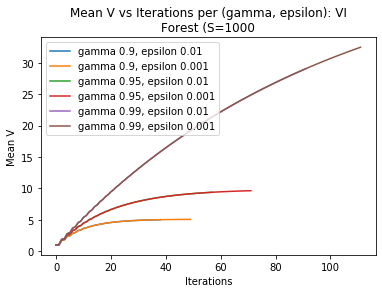

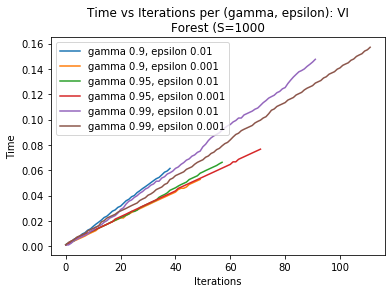

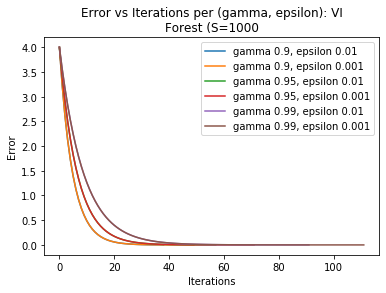

In [5]:
# VALUE ITERATION LARGE
# hparams tuning
# gamma
gamma = [.9, .95, .99]

#stopping factor
epsilon = [.01, .001]

for g in gamma:
    for e in epsilon:
        vi = mdptoolbox.mdp.ValueIteration(trans_m, reward_m, epsilon=e ,gamma=g)
        vi.run()

        reward_stats = [stat['Reward'] for stat in vi.run_stats]
        plt.figure(1)
        plt.plot(range(0, vi.iter), reward_stats, label="gamma " + str(g) + ", epsilon " + str(e))
        plt.legend()
        plt.title("Rewards vs Iterations per (gamma, epsilon): VI\nForest (S=1000)")
        plt.ylabel("Rewards")
        plt.xlabel("Iterations")
        plt.savefig('../images/vi_forest/Rewards_vs_Iterations_vi_gamma.png')


        meanv_stats = [stat['Mean V'] for stat in vi.run_stats]
        plt.figure(2)
        plt.plot(range(0, vi.iter), meanv_stats, label="gamma " + str(g) + ", epsilon " + str(e))
        plt.legend()
        plt.title("Mean V vs Iterations per (gamma, epsilon): VI\nForest (S=1000")
        plt.ylabel("Mean V")
        plt.xlabel("Iterations")
        plt.savefig('../images/vi_forest/MeanV_vs_Iterations_vi_gamma.png')

        time_stats = [stat['Time'] for stat in vi.run_stats]
        plt.figure(3)
        plt.plot(range(0, vi.iter), time_stats, label="gamma " + str(g) + ", epsilon " + str(e))
        plt.legend()
        plt.title("Time vs Iterations per (gamma, epsilon): VI\nForest (S=1000")
        plt.ylabel("Time")
        plt.xlabel("Iterations")
        plt.savefig('../images/vi_forest/Time_vs_Iterations_vi_gamma.png')

        err_stats = [stat['Error'] for stat in vi.run_stats]
        plt.figure(4)
        plt.plot(range(0, vi.iter), err_stats, label="gamma " + str(g) + ", epsilon " + str(e))
        plt.legend()
        plt.title("Error vs Iterations per (gamma, epsilon): VI\nForest (S=1000")
        plt.ylabel("Error")
        plt.xlabel("Iterations")
        plt.savefig('../images/vi_forest/Error_vs_Iterations_vi_gamma.png')

In [6]:
# Show Optimal policy
vi = mdptoolbox.mdp.ValueIteration(trans_m, reward_m, epsilon=.001 ,gamma=.99)
vi.run()
print('iterations:' + str(vi.iter))
print('Time: ' + str(vi.time))
print('Policy: ' + str(vi.policy))
print('Value: ' + str(vi.V))

iterations:112
Time: 0.13036584854125977
Policy: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

iterations:18
Time: 0.018315792083740234
Policy: (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Value: (47.117927022738975, 47.64674775251159, 47.9540499742531, 48.58515735017053, 49.29347090338876, 50.08843560958205, 50.9806518903826, 51.98201696423284, 53.10588348931728, 54.36723761399117, 55.78289880891136, 57.37174414552213, 59.15496001152747, 61.15632461983874, 63.40252507810055, 65.92351324674456, 68.75290513074458, 71.92842913074459, 75.4924291307446, 79.4924291307446)


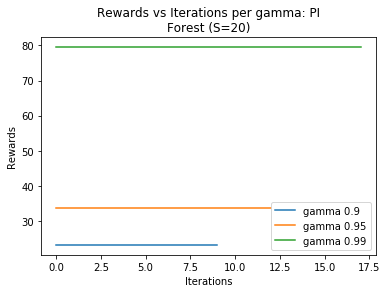

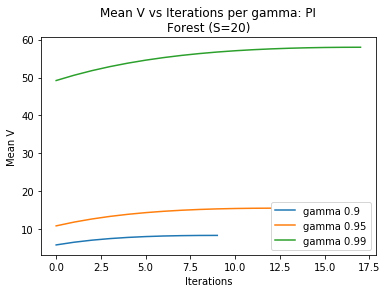

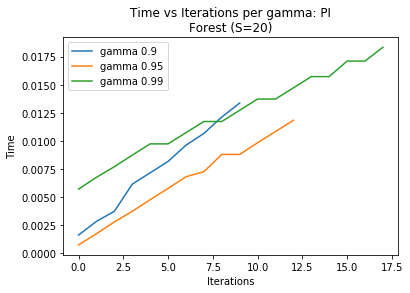

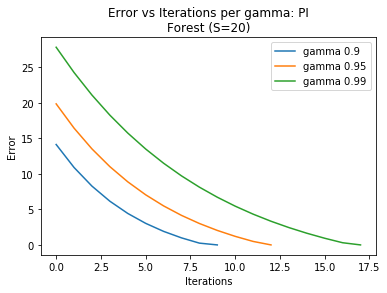

In [8]:
# POLICY ITERATION SMALL

# from example https://pymdptoolbox.readthedocs.io/en/latest/api/example.html#module-mdptoolbox.example
# P probability matrix, R reward matrix
# Default 3 states
# 2 actions Wait (a0), Cut (a1).
# state values 0-youngest, -S max oldest
trans_m, reward_m = mdptoolbox.example.forest(S=20)

# POLICY ITERATION LARGE
# hparams tuning
# gamma
gamma = [.9, .95, .99]

for g in gamma:
    pi = mdptoolbox.mdp.PolicyIteration(trans_m, reward_m, gamma=g)
    pi.run()
    
    reward_stats = [stat['Reward'] for stat in pi.run_stats]
    plt.figure(1)
    plt.plot(range(0, pi.iter), reward_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Rewards vs Iterations per gamma: PI\nForest (S=20)")
    plt.ylabel("Rewards")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/Rewards_vs_Iterations_pi_gamma_small.png')
    
    
    meanv_stats = [stat['Mean V'] for stat in pi.run_stats]
    plt.figure(2)
    plt.plot(range(0, pi.iter), meanv_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Mean V vs Iterations per gamma: PI\nForest (S=20)")
    plt.ylabel("Mean V")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/MeanV_vs_Iterations_pi_gamma_small.png')
    
    time_stats = [stat['Time'] for stat in pi.run_stats]
    plt.figure(3)
    plt.plot(range(0, pi.iter), time_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Time vs Iterations per gamma: PI\nForest (S=20)")
    plt.ylabel("Time")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/Time_vs_Iterations_pi_gamma_small.png')
    
    err_stats = [stat['Error'] for stat in pi.run_stats]
    plt.figure(4)
    plt.plot(range(0, pi.iter), err_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Error vs Iterations per gamma: PI\nForest (S=20)")
    plt.ylabel("Error")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/Error_vs_Iterations_pi_gamma_small.png')
    
# Show Optimal policy
pi = mdptoolbox.mdp.PolicyIteration(trans_m, reward_m, gamma=.99)
pi.run()
print('iterations:' + str(pi.iter))
print('Time: ' + str(pi.time))
print('Policy: ' + str(pi.policy))
# continuously increasing. Good
print('Value: ' + str(pi.V))

In [9]:
# from example https://pymdptoolbox.readthedocs.io/en/latest/api/example.html#module-mdptoolbox.example
# P probability matrix, R reward matrix
# Default 3 states
# 2 actions Wait (a0), Cut (a1).
# state values 0-youngest, -S max oldest
trans_m, reward_m = mdptoolbox.example.forest(S=1000)

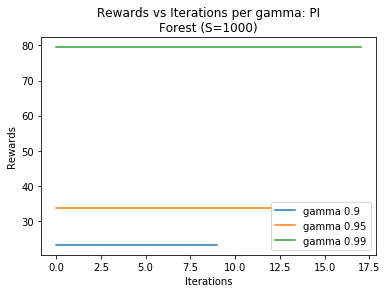

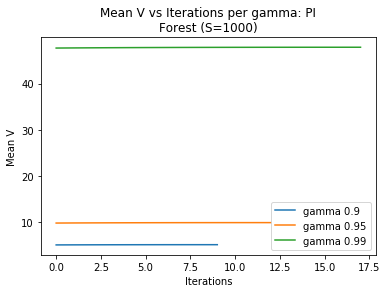

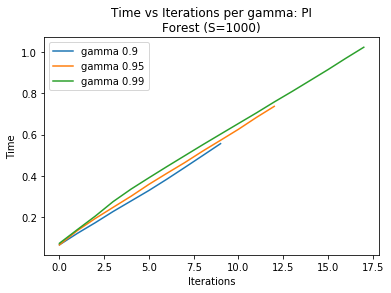

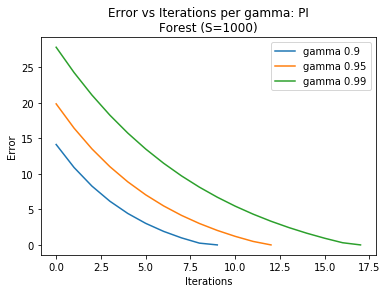

In [10]:
# POLICY ITERATION LARGE
# hparams tuning
# gamma
gamma = [.9, .95, .99]

for g in gamma:
    pi = mdptoolbox.mdp.PolicyIteration(trans_m, reward_m, gamma=g)
    pi.run()
    
    reward_stats = [stat['Reward'] for stat in pi.run_stats]
    plt.figure(1)
    plt.plot(range(0, pi.iter), reward_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Rewards vs Iterations per gamma: PI\nForest (S=1000)")
    plt.ylabel("Rewards")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/Rewards_vs_Iterations_pi_gamma.png')
    
    
    meanv_stats = [stat['Mean V'] for stat in pi.run_stats]
    plt.figure(2)
    plt.plot(range(0, pi.iter), meanv_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Mean V vs Iterations per gamma: PI\nForest (S=1000)")
    plt.ylabel("Mean V")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/MeanV_vs_Iterations_pi_gamma.png')
    
    time_stats = [stat['Time'] for stat in pi.run_stats]
    plt.figure(3)
    plt.plot(range(0, pi.iter), time_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Time vs Iterations per gamma: PI\nForest (S=1000)")
    plt.ylabel("Time")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/Time_vs_Iterations_pi_gamma.png')
    
    err_stats = [stat['Error'] for stat in pi.run_stats]
    plt.figure(4)
    plt.plot(range(0, pi.iter), err_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Error vs Iterations per gamma: PI\nForest (S=1000)")
    plt.ylabel("Error")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/Error_vs_Iterations_pi_gamma.png')


In [11]:
# Show Optimal policy
pi = mdptoolbox.mdp.PolicyIteration(trans_m, reward_m, gamma=.99)
pi.run()
print('iterations:' + str(pi.iter))
print('Time: ' + str(pi.time))
print('Policy: ' + str(pi.policy))
# continuously increasing. Good
print('Value: ' + str(pi.V))

iterations:18
Time: 0.9965481758117676
Policy: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [12]:
# Did they converge to the same policy? 
vi.policy == pi.policy

True

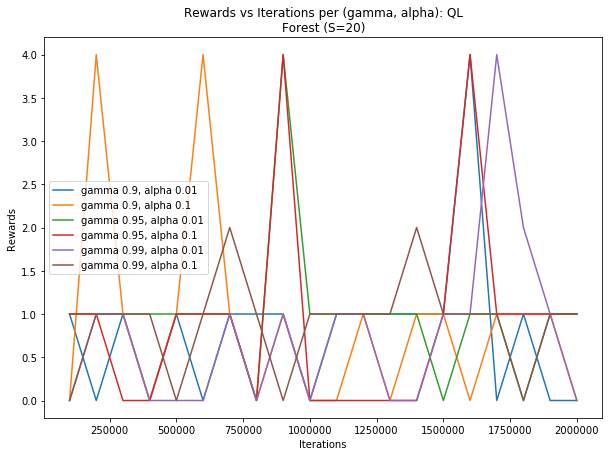

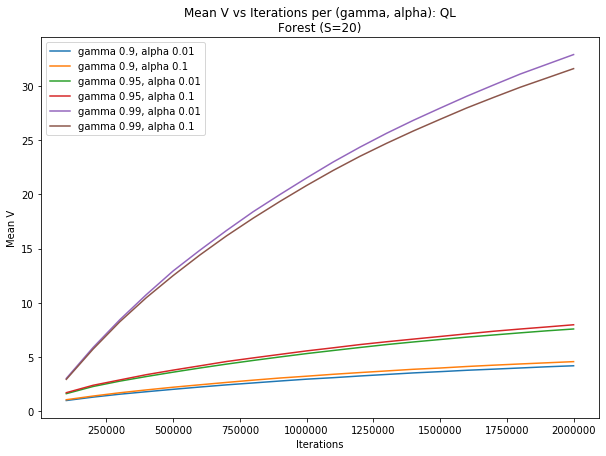

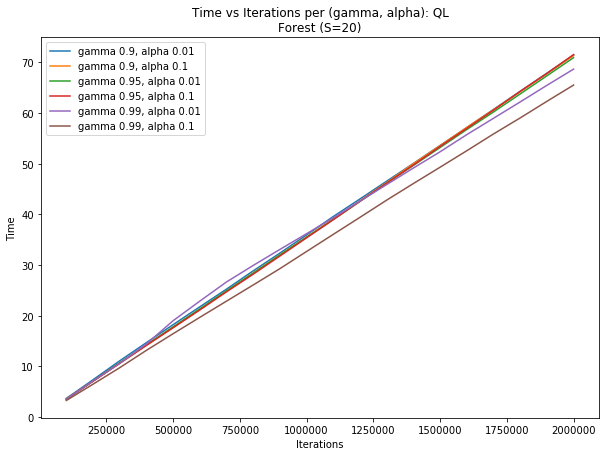

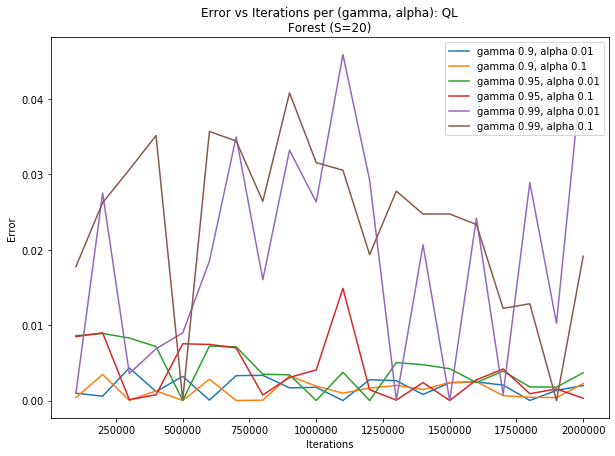

In [13]:
# QL SMALL

# from example https://pymdptoolbox.readthedocs.io/en/latest/api/example.html#module-mdptoolbox.example
# P probability matrix, R reward matrix
# Default 3 states
# 2 actions Wait (a0), Cut (a1).
# state values 0-youngest, -S max oldest
trans_m, reward_m = mdptoolbox.example.forest(S=20)

# hparams tuning
gamma = [.9, .95, .99]
alpha = [.01, .1]

iters = 2000000

for g in gamma:
    for a in alpha:
        ql = mdptoolbox.mdp.QLearning(trans_m, reward_m, gamma=g, n_iter=iters, run_stat_frequency=100000)
        ql.run()
 
        ql_iters = [stat['Iteration'] for stat in ql.run_stats] 

        reward_stats = [stat['Reward'] for stat in ql.run_stats]
        plt.figure(1, figsize=[10, 7])
        plt.plot(ql_iters, reward_stats, label="gamma " + str(g)  + ", alpha " + str(a))
        plt.legend()
        plt.title("Rewards vs Iterations per (gamma, alpha): QL\nForest (S=20)")
        plt.ylabel("Rewards")
        plt.xlabel("Iterations")
        plt.savefig('../images/ql_forest/Rewards_vs_Iterations_ql_gamma_small.png')


        meanv_stats = [stat['Mean V'] for stat in ql.run_stats]
        plt.figure(2, figsize=[10, 7])
        plt.plot(ql_iters, meanv_stats, label="gamma " + str(g)  + ", alpha " + str(a))
        plt.legend()
        plt.title("Mean V vs Iterations per (gamma, alpha): QL\nForest (S=20)")
        plt.ylabel("Mean V")
        plt.xlabel("Iterations")
        plt.savefig('../images/ql_forest/MeanV_vs_Iterations_ql_gamma_small.png')

        time_stats = [stat['Time'] for stat in ql.run_stats]
        plt.figure(3, figsize=[10, 7])
        plt.plot(ql_iters, time_stats, label="gamma " + str(g)  + ", alpha " + str(a))
        plt.legend()
        plt.title("Time vs Iterations per (gamma, alpha): QL\nForest (S=20)")
        plt.ylabel("Time")
        plt.xlabel("Iterations")
        plt.savefig('../images/ql_forest/Time_vs_Iterations_ql_gamma_small.png')

        err_stats = [stat['Error'] for stat in ql.run_stats]
        plt.figure(4, figsize=[10, 7])
        plt.plot(ql_iters, err_stats, label="gamma " + str(g)  + ", alpha " + str(a))
        plt.legend()
        plt.title("Error vs Iterations per (gamma, alpha): QL\nForest (S=20)")
        plt.ylabel("Error")
        plt.xlabel("Iterations")
        plt.savefig('../images/ql_forest/Error_vs_Iterations_ql_gamma_small.png')

In [15]:
# Show Optimal policy SMALL
ql = mdptoolbox.mdp.QLearning(trans_m, reward_m, alpha=.01, gamma=.99, n_iter=iters, run_stat_frequency=100000)
ql.run()
print('Time: ' + str(ql.time))
print('Policy: ' + str(ql.policy))
print('Value: ' + str(ql.V))
# Did they converge to the same policy?
print(ql.policy == pi.policy)
print(ql.policy == vi.policy)

Time: 74.14928674697876
Policy: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0)
Value: (47.1192041049382, 47.64965163361438, 47.63695733092782, 42.80647219239413, 29.050342461234784, 28.562823093342757, 27.825817799070137, 28.791509375520388, 26.840107988981615, 27.657196568396465, 28.583509369787606, 16.149430802933814, 37.35992867621045, 29.170286577617976, 28.648042245904126, 27.484811148441196, 27.269046139978254, 16.96777620157076, 38.05514422213819, 41.20020955026589)
False
False


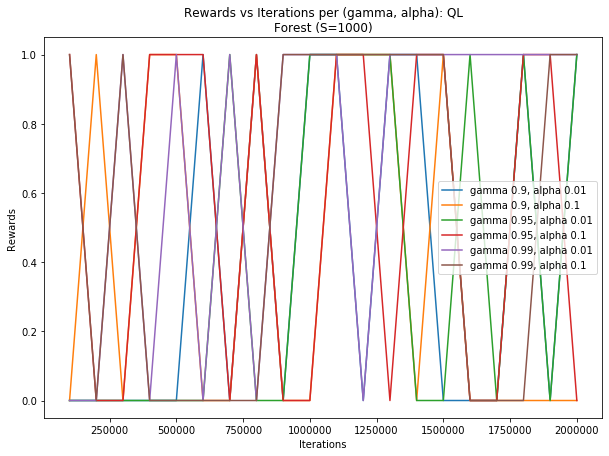

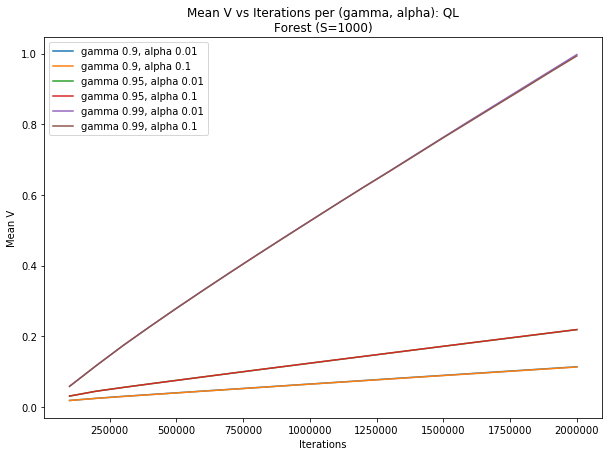

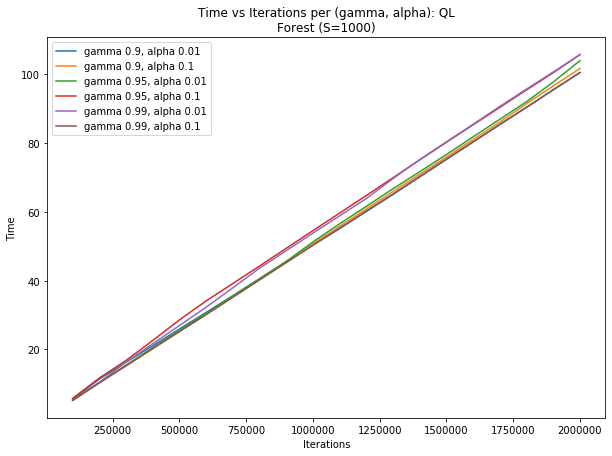

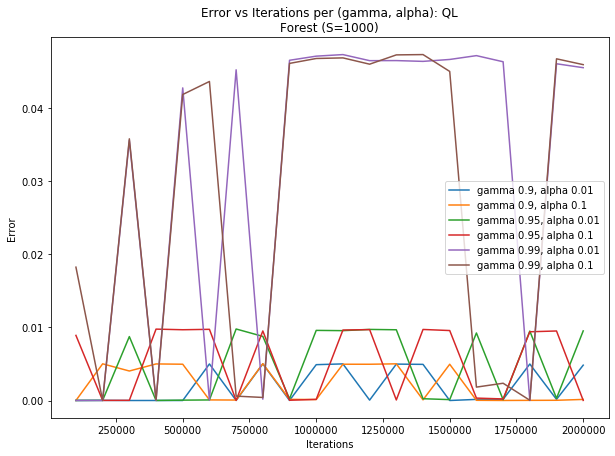

In [16]:
# from example https://pymdptoolbox.readthedocs.io/en/latest/api/example.html#module-mdptoolbox.example
# P probability matrix, R reward matrix
# Default 3 states
# 2 actions Wait (a0), Cut (a1).
# state values 0-youngest, -S max oldest
trans_m, reward_m = mdptoolbox.example.forest(S=1000)

# QL LARGE
# hparams tuning
gamma = [.9, .95, .99]
alpha = [.01, .1]

iters = 2000000

for g in gamma:
    for a in alpha:
        ql = mdptoolbox.mdp.QLearning(trans_m, reward_m, gamma=g, n_iter=iters, run_stat_frequency=100000)
        ql.run()
 
        ql_iters = [stat['Iteration'] for stat in ql.run_stats] 

        reward_stats = [stat['Reward'] for stat in ql.run_stats]
        plt.figure(1, figsize=[10, 7])
        plt.plot(ql_iters, reward_stats, label="gamma " + str(g)  + ", alpha " + str(a))
        plt.legend()
        plt.title("Rewards vs Iterations per (gamma, alpha): QL\nForest (S=1000)")
        plt.ylabel("Rewards")
        plt.xlabel("Iterations")
        plt.savefig('../images/ql_forest/Rewards_vs_Iterations_ql_gamma.png')


        meanv_stats = [stat['Mean V'] for stat in ql.run_stats]
        plt.figure(2, figsize=[10, 7])
        plt.plot(ql_iters, meanv_stats, label="gamma " + str(g)  + ", alpha " + str(a))
        plt.legend()
        plt.title("Mean V vs Iterations per (gamma, alpha): QL\nForest (S=1000)")
        plt.ylabel("Mean V")
        plt.xlabel("Iterations")
        plt.savefig('../images/ql_forest/MeanV_vs_Iterations_ql_gamma.png')

        time_stats = [stat['Time'] for stat in ql.run_stats]
        plt.figure(3, figsize=[10, 7])
        plt.plot(ql_iters, time_stats, label="gamma " + str(g)  + ", alpha " + str(a))
        plt.legend()
        plt.title("Time vs Iterations per (gamma, alpha): QL\nForest (S=1000)")
        plt.ylabel("Time")
        plt.xlabel("Iterations")
        plt.savefig('../images/ql_forest/Time_vs_Iterations_ql_gamma.png')

        err_stats = [stat['Error'] for stat in ql.run_stats]
        plt.figure(4, figsize=[10, 7])
        plt.plot(ql_iters, err_stats, label="gamma " + str(g)  + ", alpha " + str(a))
        plt.legend()
        plt.title("Error vs Iterations per (gamma, alpha): QL\nForest (S=1000)")
        plt.ylabel("Error")
        plt.xlabel("Iterations")
        plt.savefig('../images/ql_forest/Error_vs_Iterations_ql_gamma.png')




In [17]:
# Show Optimal policy
ql = mdptoolbox.mdp.QLearning(trans_m, reward_m, alpha=.1, gamma=.99, n_iter=iters, run_stat_frequency=100000)
ql.run()
print('Time: ' + str(ql.time))
print('Policy: ' + str(ql.policy))
print('Value: ' + str(ql.V))
# Did they converge to the same policy?
print(ql.policy == pi.policy)
print(ql.policy == vi.policy)

Time: 96.29033732414246
Policy: (0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1